# Limpieza de bienes raíces

Este es un conjunto de datos (dataset) reales que fue descargado usando técnicas de web scraping. La data contiene registros de **Fotocasa**, el cual es uno de los sitios más populares de bienes raíces en España. Por favor no hagas esto (web scraping) a no ser que sea para propósitos académicos.

El dataset fue descargado hace algunos años por Henry Navarro y en ningún caso se obtuvo beneficio económico de ello.

Contiene miles de datos de casas reales publicadas en la web www.fotocasa.com. Tu objetivo es extraer tanta información como sea posible con el conocimiento que tienes hasta ahora de ciencia de datos, por ejemplo ¿cuál es la casa más cara en todo el dataset?

Empecemos precisamente con esa pregunta... ¡Buena suerte!

#### Ejercicio 00. Lee el dataset assets/real_estate.csv e intenta visualizar la tabla (★☆☆)

In [ ]:
import pandas as pd

# Este archivo CSV contiene puntos y comas en lugar de comas como separadores
dataset = pd.read_csv('assets/real_estate.csv', sep=';')
dataset

,Unnamed: 0,id_realEstates,isNew,realEstate_name,phone_realEstate,url_inmueble,rooms,bathrooms,surface,price,...,level4Id,level5Id,level6Id,level7Id,level8Id,accuracy,latitude,longitude,zipCode,customZone
0,1,153771986,False,ferrari 57 inmobiliaria,912177526.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,2.0,103.0,195000,...,0,0,0,0,0,0,"40,2948276786438","-3,44402412135624",NaN,NaN
1,2,153867863,False,tecnocasa fuenlabrada ferrocarril,916358736.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,NaN,89000,...,0,0,0,0,0,1,"40,28674","-3,79351",NaN,NaN
2,3,153430440,False,look find boadilla,916350408.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,2.0,2.0,99.0,390000,...,0,0,0,0,0,0,"40,4115646786438","-3,90662252135624",NaN,NaN
3,4,152776331,False,tecnocasa fuenlabrada ferrocarril,916358736.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,86.0,89000,...,0,0,0,0,0,0,"40,2853785786438","-3,79508142135624",NaN,NaN
4,5,153180188,False,ferrari 57 inmobiliaria,912177526.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,2.0,2.0,106.0,172000,...,0,0,0,0,0,0,"40,2998774864376","-3,45226301356237",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15330,15331,153901377,False,infocasa consulting,911360461.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,2.0,1.0,96.0,259470,...,0,0,0,0,0,0,"40,45416","-3,70286",NaN,NaN
15331,15332,150394373,False,inmobiliaria pulpon,912788039.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,150.0,165000,...,0,0,0,0,0,0,"40,36652","-3,48951",NaN,NaN
15332,15333,153901397,False,tecnocasa torrelodones,912780348.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,4.0,2.0,175.0,495000,...,0,0,0,0,0,0,"40,57444","-3,92124",NaN,NaN
15333,15334,152607440,False,inmobiliaria pulpon,912788039.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,2.0,101.0,195000,...,0,0,0,0,0,0,"40,36967","-3,48105",NaN,NaN


#### Ejercicio 01. ¿Cuál es la casa más cara en todo el dataset? (★☆☆)

Imprime la dirección y el precio de la casa seleccionada. Por ejemplo:

`La casa con dirección en Calle del Prado, Nº20 es la más cara y su precio es de 5000000 USD`

In [ ]:
idx_max = dataset["price"].idxmax()                 # Localizar el ID del valor mas alto en precio
direccion = dataset.loc[idx_max, "realEstate_name"] # Usamos ese ID para buscar su nombre
precio = dataset.loc[idx_max, "price"]              # Usamos ese ID para buscar su precio
print(f'La casa con dirección {direccion} es la más cara y su precio es de {precio} USD')

La casa con dirección engel volkers torrelodones es la más cara y su precio es de 8500000 USD


#### Ejercicio 02. ¿Cuál es la casa más barata del dataset? (★☆☆)

Imprime la dirección y el precio de la casa seleccionada. Por ejemplo:

`La casa con dirección en Calle Alcalá, Nº58 es la más barata y su precio es de 12000 USD`

In [ ]:
casas_validas = dataset[dataset["price"] > 0]             # Primero filtramos las casas con 0 de precio, no interesan, si interesasen, eliminar esta linea y cambiar los dataframes
idx_min = casas_validas["price"].idxmin()                 # Localizar el ID del valor mas bajo en precio
direccion = casas_validas.loc[idx_min, "realEstate_name"] # Usamos ese ID para buscar su nombre
precio = casas_validas.loc[idx_min, "price"]              # Usamos ese ID para buscar su precio
print(f'La casa con dirección {direccion} es la más barata y su precio es de {precio} USD')

La casa con dirección redpiso coslada es la más barata y su precio es de 600 USD


#### Ejercicio 03. ¿Cuál es la casa más grande y la más pequeña del dataset? (★☆☆)

Imprime la dirección y el área de las casas seleccionadas. Por ejemplo:

`La casa más grande está ubicada en Calle Gran Vía, Nº38 y su superficie es de 5000 metros`

`La casa más pequeña está ubicada en Calle Mayor, Nº12 y su superficie es de 200 metros`

In [ ]:
idx_max = dataset["surface"].idxmax()                       # Localizar el ID del valor mas alto en tamaño
casas_validas = dataset[dataset["surface"] > 0]             # Primero filtramos las casas con 0 de tamaño, no interesan, si interesasen, eliminar esta linea y cambiar los dataframes
idx_min = casas_validas["surface"].idxmin()                 # Localizar el ID del valor mas bajo en tamaño

direccion_max = dataset.loc[idx_max, "realEstate_name"]     # Usamos ese ID para buscar su nombre
superficie_max = dataset.loc[idx_max, "surface"]            # Usamos ese ID para buscar su precio
direccion_min = casas_validas.loc[idx_min, "realEstate_name"]   # Usamos ese ID para buscar su nombre
superficie_min = casas_validas.loc[idx_min, "surface"]      # Usamos ese ID para buscar su precio

print(f'La casa con dirección {direccion_max} es la más grande y su superficie es de {superficie_max} metros')
print(f'La casa con dirección {direccion_min} es la más pequeña y su superficie es de {superficie_min} metros')

La casa con dirección habitarium inmobiliaria es la más grande y su superficie es de 249000.0 metros
La casa con dirección toledo21 es la más pequeña y su superficie es de 15.0 metros


#### Ejercicio 04. ¿Cuantas poblaciones (columna level5) contiene el dataset? (★☆☆)

Imprime el nombre de las poblaciones separadas por coma. Por ejemplo:

`> print(populations)`

`population1, population2, population3, ...`

In [ ]:
populations = dataset["level5"].dropna().unique() # Seleccionamos todos los "level5", quitamos los N/A y dejamos solo los que son unicos
print(", ".join(populations))                     # Imprimimos las populations con una coma como separador

Arganda del Rey, Fuenlabrada, Boadilla del Monte, Las Rozas de Madrid,  Madrid Capital, Villaviciosa de Odón, Pinto, Valdemoro, Navalcarnero, Pozuelo de Alarcón, Torrejón de Ardoz, Navalagamella, San Sebastián de los Reyes, Rivas-vaciamadrid, Alpedrete, Móstoles, San Fernando de Henares, Coslada, Becerril de la Sierra, Alcalá de Henares, Chinchón, Parla, Alcorcón, El Escorial, Leganés, Pedrezuela, Majadahonda, Villanueva de la Cañada, Villanueva del Pardillo, Torrelodones, Moralzarzal, Mejorada del Campo, Aranjuez, Corpa, Getafe, Velilla de San Antonio, Sevilla la Nueva, San Martín de la Vega, Villalbilla, Collado Villalba, Alcobendas, El Molar (Madrid), Moraleja de Enmedio, Algete, Campo Real, Torrejón de la Calzada, Colmenar Viejo, Valdemorillo, Fuente El Saz de Jarama, Tres Cantos, Arroyomolinos (Madrid), Griñón, Paracuellos de Jarama, Guadarrama, Titulcia, Galapagar, Collado Mediano, Los Molinos, San Lorenzo de El Escorial, Loeches, San Martín de Valdeiglesias, Navas del Rey, Busta

#### Ejercicio 05. ¿El dataset contiene valores no admitidos (NAs)? (★☆☆)

Imprima un booleano (`True` o `False`) seguido de la fila/columna que contiene el NAs.

In [ ]:
na_check = dataset.isna().any()         # isna() crea un dataframe booleano, si el valor incluye algun N/A pasa a ser True. any() devuelve una serie si algun valor es 'True'
na_check

Unnamed: 0          False
id_realEstates      False
isNew               False
realEstate_name      True
phone_realEstate     True
url_inmueble        False
rooms                True
bathrooms            True
surface              True
price               False
date                False
description          True
address             False
country             False
level1              False
level2              False
level3              False
level4               True
level5              False
level6               True
level7               True
level8               True
upperLevel          False
countryId           False
level1Id            False
level2Id            False
level3Id            False
level4Id            False
level5Id            False
level6Id            False
level7Id            False
level8Id            False
accuracy            False
latitude            False
longitude           False
zipCode              True
customZone           True
pps                  True
dtype: bool

#### Ejercicio 06. Elimina los NAs del dataset, si aplica (★★☆)

Imprima una comparación entre las dimensiones del DataFrame original versus el DataFrame después de las eliminaciones.


In [ ]:
columnas_ignorar = ["zipCode", "customZone", "level1", "level2", "level3", "level4", "level5", "level6", "level7"]
# Se ignoran ciertas columnas por que contienen N/A en todos los registros (o mas del 50%), el nuevo dataframe quedaria vacío
columnas_relevantes = [col for col in dataset.columns if col not in columnas_ignorar] # Filtramos las columnas con nuestra lista, haciendo otra pero solo de las columnas que nos interesan
dataset_limpio = dataset.dropna(subset=columnas_relevantes)                           # Eliminamos filas que tengan NAs solo en las columnas relevantes

print(f"Original: {dataset.shape}")
print(f"Después de limpieza: {dataset_limpio.shape}")

Original: (15335, 37)
Después de limpieza: (0, 37)


#### Ejercicio 07. ¿Cuál la media de precios en la población (columna level5) de "Arroyomolinos (Madrid)"? (★★☆)

Imprima el valor obtenido.

In [ ]:
media_arroyomolinos = dataset[dataset["level5"] == "Arroyomolinos (Madrid)"]["price"].mean() # Filtramos solo las filas donde la columna level5 coincide con "Arroyomolinos (Madrid)", de ello tomamos el precio con .mean)=
print(media_arroyomolinos)

294541.59854014596


#### Ejercicio 08. Trazar el histograma de los precios para la población (level5 column) de "Arroyomolinos (Madrid)" y explica qué observas (★★☆)

Imprime el histograma de los precios y escribe en la celda del Markdown un breve análisis del trazado.


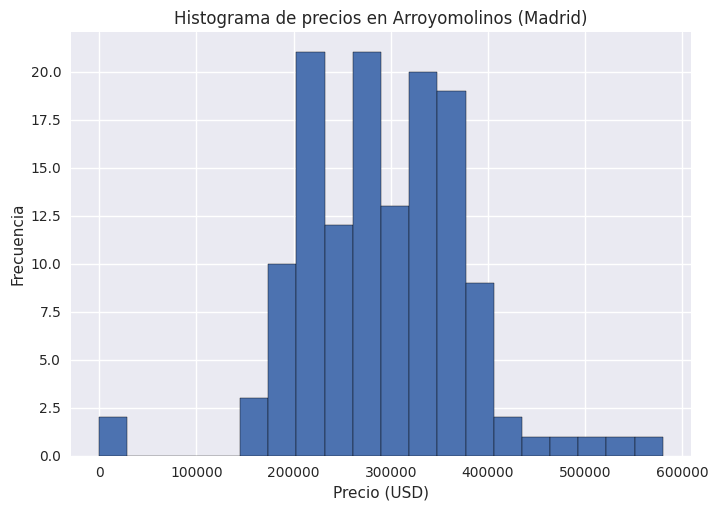

In [ ]:
import matplotlib.pyplot as plt
arroyomolinos = dataset[dataset["level5"] == "Arroyomolinos (Madrid)"]["price"]

plt.hist(arroyomolinos, bins=20, edgecolor="black")
plt.title("Histograma de precios en Arroyomolinos (Madrid)")
plt.xlabel("Precio (USD)")
plt.ylabel("Frecuencia")
plt.grid(True)
plt.show()

La mayoría de los precios en Arroyomolinos (Madrid) se concentran en rangos medios con algunas casas en altos rangos. La gran mayoria se concentra entre 200.000 USD y 400.000 USD.

#### Ejercicio 09. ¿Son los precios promedios de "Valdemorillo" y "Galapagar" los mismos? (★★☆)

Imprime ambos promedios y escribe una conclusión sobre ellos.

In [ ]:
media_valdemorillo = dataset[dataset["level5"] == "Valdemorillo"]["price"].mean()
media_galapagar = dataset[dataset["level5"] == "Galapagar"]["price"].mean()

print(f"Valdemorillo: {media_valdemorillo}")
print(f"Galapagar: {media_galapagar}")

Valdemorillo: 363860.2931034483
Galapagar: 360063.20238095237


Los precios de Valedemorillo son ligeramente superiores a los de Galapagar por la zona

#### Ejercicio 10. ¿Son los promedios de precio por metro cuadrado (precio/m2) de "Valdemorillo" y "Galapagar" los mismos? (★★☆)

Imprime ambos promedios de precio por metro cuadrado y escribe una conclusión sobre ellos.

Pista: Crea una nueva columna llamada `pps` (*price per square* o precio por metro cuadrado) y luego analiza los valores.

In [ ]:
dataset["pps"] = dataset["price"] / dataset["surface"]

pps_valdemorillo = dataset[dataset["level5"] == "Valdemorillo"]["pps"].mean()
pps_galapagar = dataset[dataset["level5"] == "Galapagar"]["pps"].mean()

print(f"Valdemorillo (€/m2): {pps_valdemorillo}")
print(f"Galapagar (€/m2): {pps_galapagar}")

Valdemorillo (€/m2): 1317.9502109024986
Galapagar (€/m2): 1606.3240303094024


#### Ejercicio 11. Analiza la relación entre la superficie y el precio de las casas. (★★☆)

Pista: Puedes hacer un `scatter plot` y luego escribir una conclusión al respecto.

In [ ]:
# correlacion = dataset[["surface", "price"]].corr().iloc[0, 1] # Localiza por indice en vez de por nombre
# print(f"Correlación entre superficie y precio: {correlacion:.2f}")

Correlación entre superficie y precio: 0.05


La correlación positiva sugiere que, en general, a mayor superficie, mayor precio.

#### Ejercicio 12. ¿Cuántas agencia de bienes raíces contiene el dataset? (★★☆)

Imprime el valor obtenido.

In [ ]:
agencias_unicas = dataset["realEstate_name"].nunique()
print(agencias_unicas)

1821


#### Ejercicio 13. ¿Cuál es la población (columna level5) que contiene la mayor cantidad de casas?(★★☆)

Imprima la población y el número de casas.

In [ ]:
conteo = dataset["level5"].value_counts()
poblacion_max = conteo.idxmax()
cantidad = conteo.max()

print(f"{poblacion_max} con {cantidad} casas")

 Madrid Capital con 6643 casas


#### Ejercicio 14. Ahora vamos a trabajar con el "cinturón sur" de Madrid. Haz un subconjunto del DataFrame original que contenga las siguientes poblaciones (columna level5): "Fuenlabrada", "Leganés", "Getafe", "Alcorcón" (★★☆)

Pista: Filtra el DataFrame original usando la columna `level5` y la función `isin`.

In [ ]:
poblaciones_cinturon = ["Fuenlabrada", "Leganés", "Getafe", "Alcorcón"]
subset_sur = dataset[dataset["level5"].isin(poblaciones_cinturon)]
subset_sur

,Unnamed: 0,id_realEstates,isNew,realEstate_name,phone_realEstate,url_inmueble,rooms,bathrooms,surface,price,...,level5Id,level6Id,level7Id,level8Id,accuracy,latitude,longitude,zipCode,customZone,pps
1,2,153867863,False,tecnocasa fuenlabrada ferrocarril,916358736.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,NaN,89000,...,0,0,0,0,1,"40,28674","-3,79351",NaN,NaN,NaN
3,4,152776331,False,tecnocasa fuenlabrada ferrocarril,916358736.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,86.0,89000,...,0,0,0,0,0,"40,2853785786438","-3,79508142135624",NaN,NaN,1034.883721
85,86,153152077,False,sinergical inmobiliaria,NaN,https://www.fotocasa.es/es/comprar/vivienda/le...,1.0,1.0,50.0,107000,...,0,0,0,0,1,"40,35059","-3,82693",NaN,NaN,2140.000000
94,95,153995577,False,viviendas365com,911226014.0,https://www.fotocasa.es/es/comprar/vivienda/le...,3.0,2.0,120.0,320000,...,0,0,0,0,0,"40,31933","-3,77574",NaN,NaN,2666.666667
109,110,153586414,False,area uno asesores inmobiliarios,912664081.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,3.0,142.0,425000,...,0,0,0,0,0,"40,3313411","-3,8313868",NaN,NaN,2992.957746
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15275,15276,153903887,False,aliseda servicios de gestion inmobiliaria,911368198.0,https://www.fotocasa.es/es/comprar/vivienda/al...,3.0,1.0,78.0,138000,...,0,0,0,0,1,"40,31381","-3,83733",NaN,NaN,1769.230769
15291,15292,151697757,False,unipiso,912788631.0,https://www.fotocasa.es/es/comprar/vivienda/al...,3.0,2.0,110.0,279000,...,0,0,0,0,0,"40,3259051","-3,76318",NaN,NaN,2536.363636
15305,15306,153902389,False,jadein ferrero,914871639.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,2.0,85.0,170000,...,0,0,0,0,0,"40,2882193","-3,8098617",NaN,NaN,2000.000000
15322,15323,153871864,False,gestion comercial,911220662.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,91.0,112000,...,0,0,0,0,0,"40,28282","-3,78892",NaN,NaN,1230.769231


#### Ejercicio 15. Traza un gráfico de barras de la mediana de los precios y explica lo que observas (debes usar el subconjunto obtenido del Ejercicio 14) (★★★)

Imprima un gráfico de barras de la mediana de precios y escriba en la celda Markdown un breve análisis sobre el gráfico.

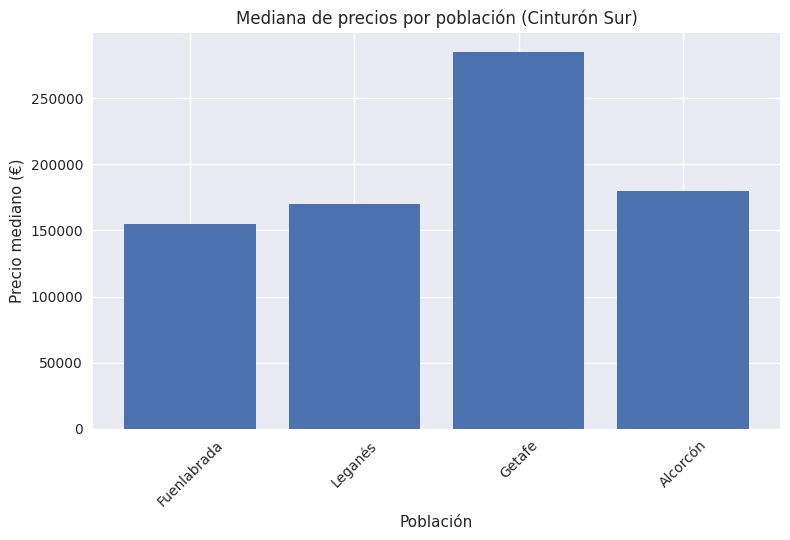

In [ ]:
poblaciones_cinturon = ["Fuenlabrada", "Leganés", "Getafe", "Alcorcón"] # Deberia de funcionar sin esto
subset_sur = dataset[dataset["level5"].isin(poblaciones_cinturon)]      # Deberia de funcionar sin esto
medianas = subset_sur.groupby("level5")["price"].median().reindex(poblaciones_cinturon)

plt.bar(medianas.index, medianas.values)
plt.title("Mediana de precios por población (Cinturón Sur)")
plt.xlabel("Población")
plt.ylabel("Precio mediano (€)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True, axis='y')
plt.show()

Getafe parece tener un mercado inmobiliario más caro dentro del cinturón sur. Fuenlabrada es la opción más asequible.

#### Ejercicio 16. Calcula la media y la varianza de muestra para las siguientes variables: precio, habitaciones, superficie y baños (debes usar el subconjunto obtenido del Ejercicio 14) (★★★)

Imprime ambos valores por cada variable.

In [ ]:
variables = ["price", "rooms", "surface", "bathrooms"]

for var in variables:
    media = subset_sur[var].mean()
    varianza = subset_sur[var].var()
    print(f"{var}: media = {media:.2f}, varianza = {varianza:.2f}")

price: media = 223094.48, varianza = 14921367508.05
rooms: media = 3.02, varianza = 0.72
surface: media = 111.75, varianza = 4263.05
bathrooms: media = 1.63, varianza = 0.57


#### Ejercicio 17. ¿Cuál es la casa más cara de cada población? Debes usar el subset obtenido en la pregunta 14 (★★☆)

Imprime tanto la dirección como el precio de la casa seleccionada de cada población. Puedes imprimir un DataFrame o una sola línea para cada población.

In [ ]:
for poblacion in poblaciones_cinturon:
    sub = subset_sur[subset_sur["level5"] == poblacion]
    idx = sub["price"].idxmax()
    direccion = sub.loc[idx, "address"]
    precio = sub.loc[idx, "price"]
    print(f"{poblacion}: {direccion} - {precio}€")

Fuenlabrada: Calle de Paulo Freire, 5, Fuenlabrada - 490000€
Leganés: Avenida Reina Sofía, Leganés - 650000€
Getafe: Getafe - 1050000€
Alcorcón: Alcorcón - 950000€


#### Ejercicio 18. Normaliza la variable de precios para cada población y traza los 4 histogramas en el mismo gráfico (debes usar el subconjunto obtenido en la pregunta 14) (★★★)

Para el método de normalización, puedes usar el que consideres adecuado, no hay una única respuesta correcta para esta pregunta. Imprime el gráfico y escribe en la celda de Markdown un breve análisis sobre el gráfico.

Pista: Puedes ayudarte revisando la demostración multihist de Matplotlib.

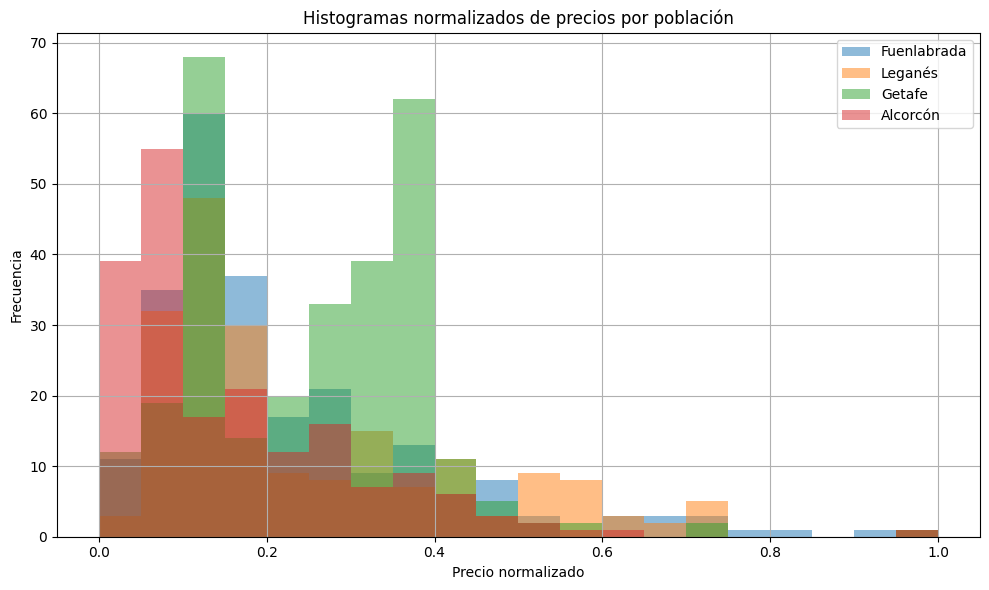

In [ ]:
subset_sur.loc[:, "price_norm"] = subset_sur.groupby("level5")["price"].transform(
    lambda x: (x - x.min()) / (x.max() - x.min())
)

poblaciones = ["Fuenlabrada", "Leganés", "Getafe", "Alcorcón"]

plt.figure(figsize=(10, 6))

for poblacion in poblaciones:
    precios = subset_sur[subset_sur["level5"] == poblacion]["price_norm"]
    plt.hist(precios, bins=20, alpha=0.5, label=poblacion)

plt.title("Histogramas normalizados de precios por población")
plt.xlabel("Precio normalizado")
plt.ylabel("Frecuencia")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#### Ejercicio 19. ¿Qué puedes decir sobre el precio por metro cuadrado (precio/m2) entre los municipios de 'Getafe' y 'Alcorcón'? Debes usar el subconjunto obtenido en la pregunta 14 (★★☆)

Pista: Crea una nueva columna llamada `pps` (price per square en inglés) y luego analiza los valores

In [ ]:
subset_sur.loc[:, "pps"] = subset_sur["price"] / subset_sur["surface"]

pps_getafe = subset_sur[subset_sur["level5"] == "Getafe"]["pps"].mean()
pps_alcorcon = subset_sur[subset_sur["level5"] == "Alcorcón"]["pps"].mean()

print(f"Getafe: {pps_getafe:.2f} €/m²")
print(f"Alcorcón: {pps_alcorcon:.2f} €/m²")

Getafe: 2066.31 €/m²
Alcorcón: 2239.30 €/m²


El precio medio por metro cuadrado es 2066.31 €/m² en Getafe y 2239.30 €/m² en Alcorcón.
A pesar de que Getafe muestra precios más altos en valor absoluto, Alcorcón tiene un coste más elevado por superficie, lo que podría indicar viviendas más pequeñas o mayor demanda relativa por m².

#### Ejercicio 20. Realiza el mismo gráfico para 4 poblaciones diferentes (columna level5) y colócalos en el mismo gráfico. Debes usar el subconjunto obtenido en la pregunta 14 (★★☆) 
Pista: Haz un diagrama de dispersión de cada población usando subgráficos (subplots).

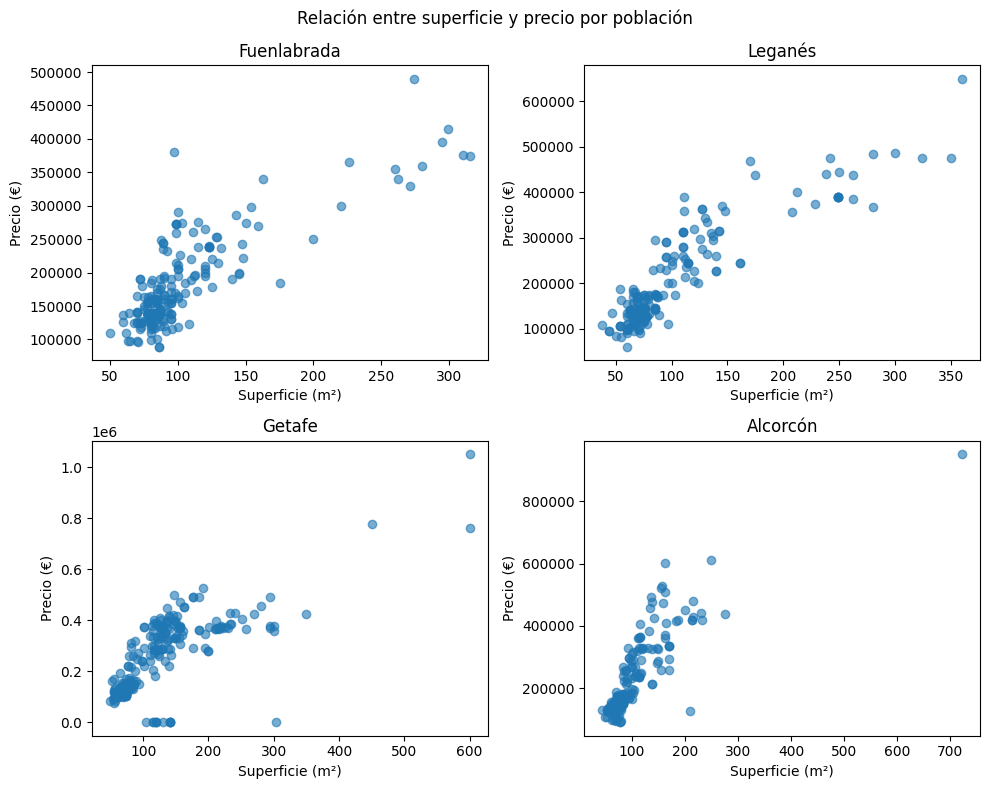

In [ ]:
poblaciones = ["Fuenlabrada", "Leganés", "Getafe", "Alcorcón"]

fig, axs = plt.subplots(2, 2, figsize=(10, 8))
axs = axs.flatten()

for i, poblacion in enumerate(poblaciones):
    data = subset_sur[subset_sur["level5"] == poblacion]
    axs[i].scatter(data["surface"], data["price"], alpha=0.6)
    axs[i].set_title(poblacion)
    axs[i].set_xlabel("Superficie (m²)")
    axs[i].set_ylabel("Precio (€)")

plt.suptitle("Relación entre superficie y precio por población")
plt.tight_layout()
plt.show()

#### Ejercicio 21. Realiza un trazado de las coordenadas (columnas latitud y longitud) del cinturón sur de Madrid por color de cada población (debes usar el subconjunto obtenido del Ejercicio 14) (★★★★)

Ejecuta la siguiente celda y luego comienza a codear en la siguiente. Debes implementar un código simple que transforme las columnas de coordenadas en un diccionario de Python (agrega más información si es necesario) y agrégala al mapa.

In [ ]:
from ipyleaflet import Map, basemaps

map = Map(center = (40.35, -3.8), zoom = 11.5, min_zoom = 1, max_zoom = 20, 
    basemap=basemaps.OpenStreetMap.Mapnik)
map

Map(center=[40.35, -3.8], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_ou…

In [ ]:
from ipyleaflet import Marker, AwesomeIcon, WidgetControl
from ipywidgets import HTML

mapa = Map(center=(40.35, -3.8), zoom=11.5, basemap=basemaps.OpenStreetMap.Mapnik)

colores = {
    "Fuenlabrada": "red",
    "Leganés": "blue",
    "Getafe": "green",
    "Alcorcón": "purple"
}

for _, row in subset_sur.iterrows():
    try:
        lat = float(str(row["latitude"]).replace(",", "."))
        lon = float(str(row["longitude"]).replace(",", "."))
        poblacion = row["level5"]
        
        if poblacion in colores:
            icono = AwesomeIcon(
                name="home",
                marker_color=colores[poblacion],
                icon_color="white"
            )
            marker = Marker(location=(lat, lon), icon=icono)
            mapa.add_layer(marker)
    except:
        continue

leyenda_html = HTML(
    value="""
    <div style='background-color:white; padding: 10px; border:1px solid gray'>
        <b>Leyenda:</b><br>
        <span style='color:red'>⬤</span> Fuenlabrada<br>
        <span style='color:blue'>⬤</span> Leganés<br>
        <span style='color:green'>⬤</span> Getafe<br>
        <span style='color:purple'>⬤</span> Alcorcón
    </div>
    """
)

leyenda = WidgetControl(widget=leyenda_html, position="topright")
mapa.add_control(leyenda)

mapa

Map(center=[40.35, -3.8], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_ou…